In [3]:
import tensorflow as tf

In [5]:
print("GPU 사용이 가능한가 : "),
print(tf.test.is_gpu_available())

print("텐서가 GPU #0에 있는가 : "),
print(rand.device.endswith('GPU:0'))

GPU 사용이 가능한가 : 
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False
텐서가 GPU #0에 있는가 : 
False


### [텐서플로우를 이용한 난수생성기에 대한 이해]

In [6]:
#tf.random.set_seed(5)   #seed번호가 있으면 그 번호는 항상 같은 값이 나옴
rand=tf.random.uniform([1],0,1)  #균일분포로 난수를 생성하고 1차원 배열에 할당, 최솟값 0, 최대값 1
print(rand)

tf.Tensor([0.4351449], shape=(1,), dtype=float32)


In [7]:
rand=tf.random.normal([4],0,1) #정규분포(종모양의 분포성을 띔, 95%의 유값을 가짐), 4개값을 난수로구함, 평균이 0 이고 표준편차가 1로작성
print(rand)

tf.Tensor([ 0.36730152 -1.7965908  -0.2230247   1.2823185 ], shape=(4,), dtype=float32)


### [텐서플로우를 이용한 선형회귀]

C:\Users\BSS\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


99 a: 1.3849028 b: 1.5216141 loss: 28.078379


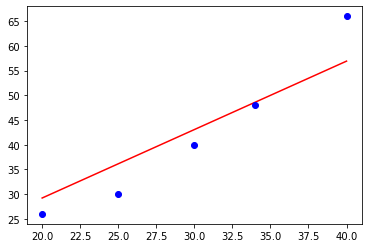

199 a: 1.4222149 b: 0.53634286 loss: 26.115551


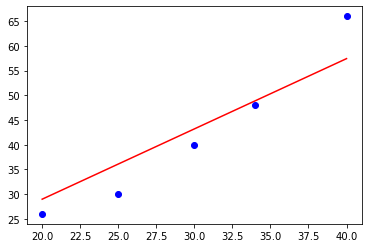

299 a: 1.4615064 b: -0.69556856 loss: 23.85717


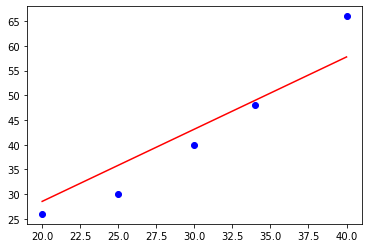

399 a: 1.505513 b: -2.0755851 loss: 21.512716


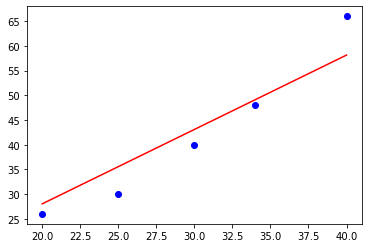

499 a: 1.5521244 b: -3.5373447 loss: 19.243093


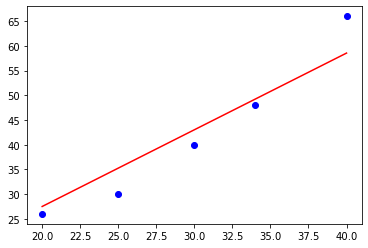

599 a: 1.5996797 b: -5.0287495 loss: 17.154022


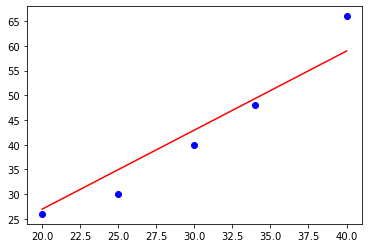

699 a: 1.646841 b: -6.5078373 loss: 15.308261


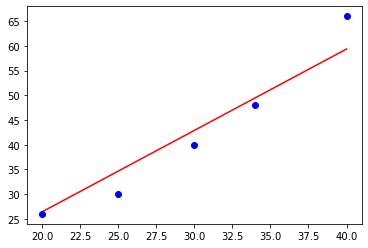

799 a: 1.6925343 b: -7.940913 loss: 13.734607


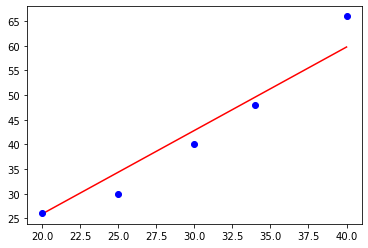

899 a: 1.7359154 b: -9.301495 loss: 12.43609


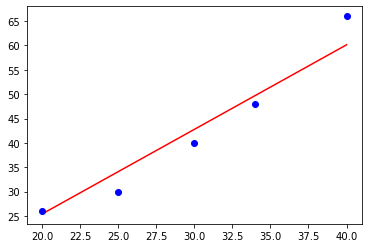

999 a: 1.7763473 b: -10.569592 loss: 11.397324


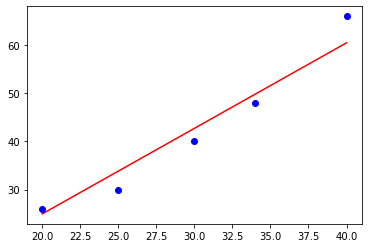

-------------- 최종 그래프 -------------


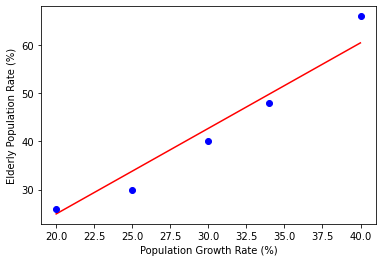

In [13]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

X=[20,25,30,34,40]
Y=[26,30,40,48,66]


# a와 b를 랜덤한 값으로 초기화합니다.
w = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = w * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)  #learningRage 값

for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[w,b])
    
    if i % 100 == 99:
        print(i, 'a:', w.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())
        plt.plot(X,w*X+b,'r-')
        plt.plot(X,Y,'bo')
        plt.show()

line_x = np.arange(min(X), max(X), 0.01)
line_y = w * line_x + b


print('-------------- 최종 그래프 -------------')
# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()